In [ ]:
import pandas as pd
import io
import requests

customers_file_id = '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_file_id = '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_file_id = '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

def read_csv_from_google_drive(file_id):
    """Reads a CSV file from Google Drive given its file ID."""
    url = f'https://docs.google.com/uc?export=download&id={file_id}'
    response = requests.get(url)
    response.raise_for_status()
    return pd.read_csv(io.StringIO(response.text))

customers = read_csv_from_google_drive(customers_file_id)
products = read_csv_from_google_drive(products_file_id)
transactions = read_csv_from_google_drive(transactions_file_id)

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [ ]:

merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')

final_merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

print(final_merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [ ]:

print(final_merged_df.columns)
column_name = 'ProductPrice'

if column_name in final_merged_df.columns:
    quantiles = final_merged_df[column_name].quantile([0.25, 0.5, 0.75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    iqr = q3 - q1

    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Column 'ProductPrice' not found in the DataFrame.


In [ ]:

print(final_merged_df.columns)


column_name = 'Price_x'


if column_name in final_merged_df.columns:
    quantiles = final_merged_df[column_name].quantile([0.25, 0.5, 0.75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    iqr = q3 - q1

    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Q1: 147.95
Q3: 404.4
IQR: 256.45


In [ ]:

print(final_merged_df.columns)


column_name = 'Price_y'

if column_name in final_merged_df.columns:
    quantiles = final_merged_df[column_name].quantile([0.25, 0.5, 0.75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    iqr = q3 - q1

    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Q1: 147.95
Q3: 404.4
IQR: 256.45


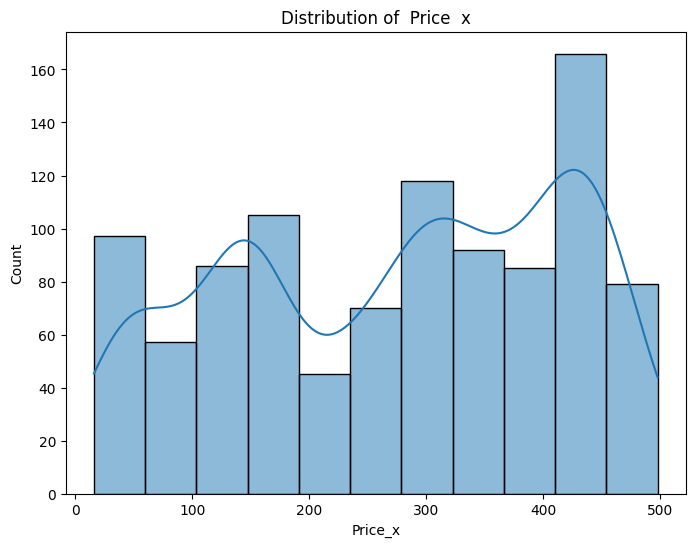

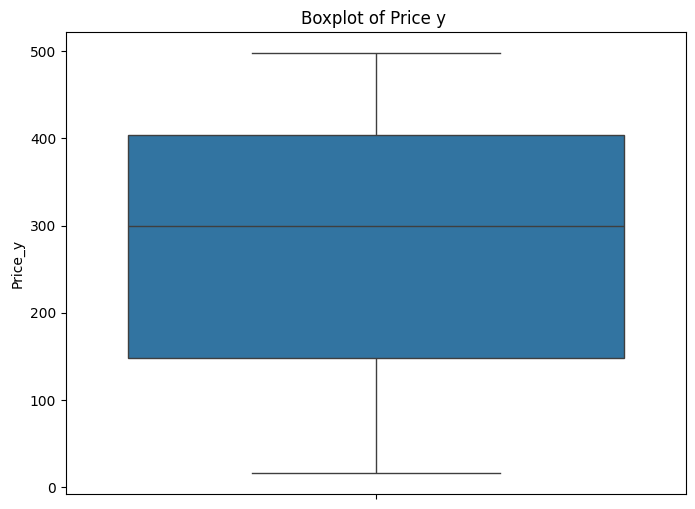

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


#Histogram
plt.figure(figsize=(8,6))
sns.histplot(final_merged_df['Price_x'],kde=True)
plt.title('Distribution of  Price  x')
plt.show()

#BoxPlot
plt.figure(figsize=(8,6))
sns.boxplot(y=final_merged_df['Price_y'])
plt.title('Boxplot of Price y ')
plt.show()




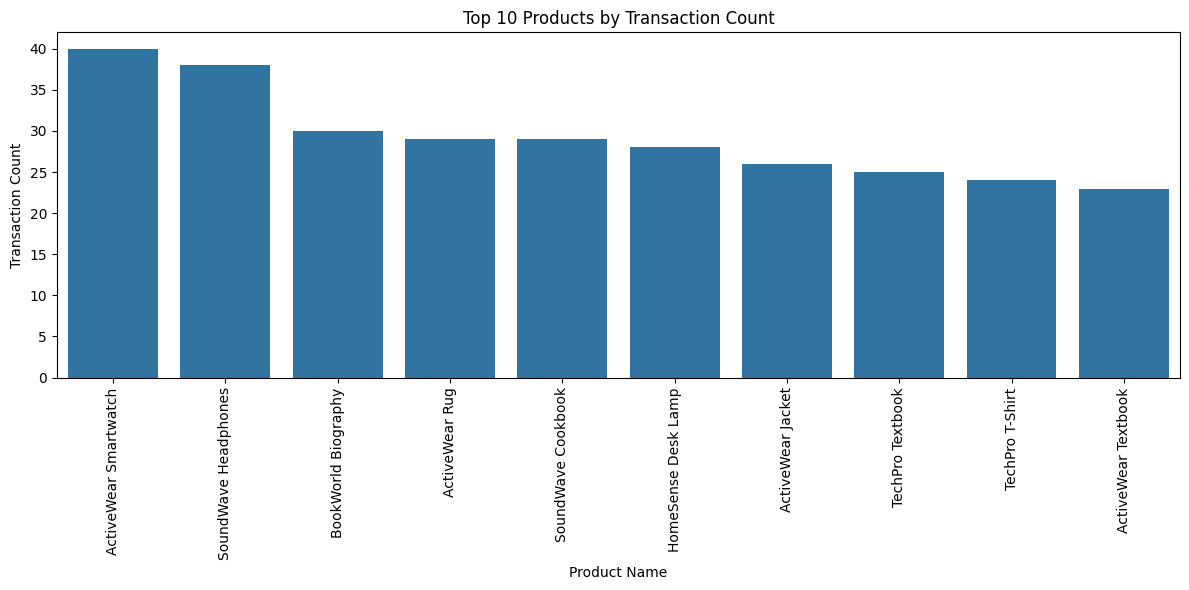

In [ ]:


product_counts = final_merged_df['ProductName'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Product Name")
plt.ylabel("Transaction Count")
plt.title("Top 10 Products by Transaction Count")
plt.tight_layout()
plt.show()

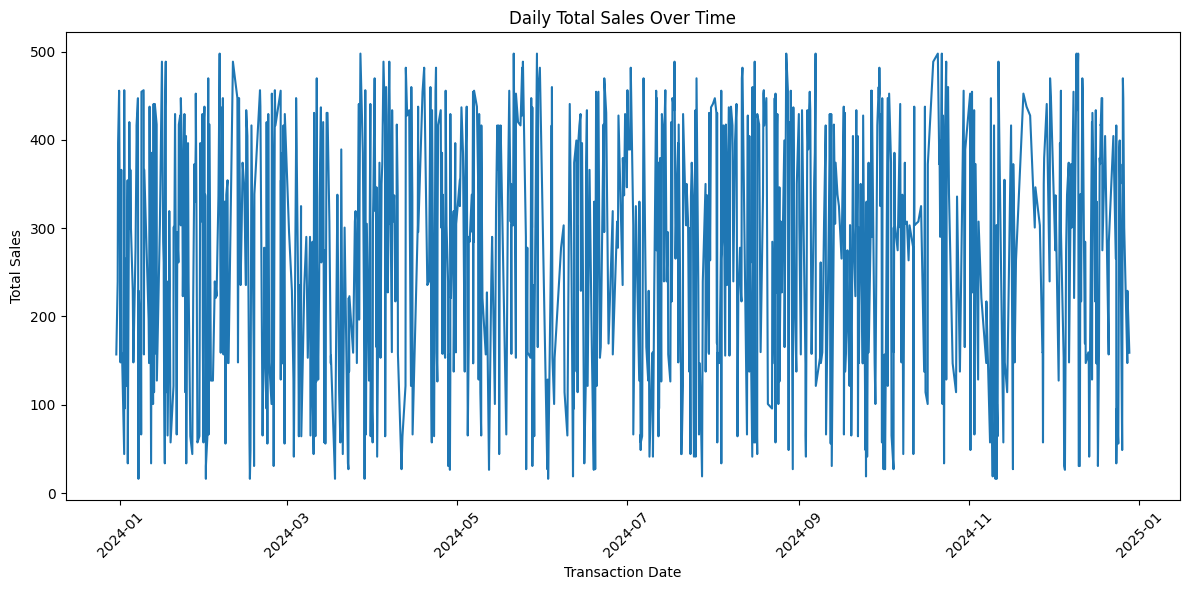

In [ ]:
# prompt: can you suggest a time series graph usng the above dataset

import matplotlib.pyplot as plt
import seaborn as sns


if not pd.api.types.is_datetime64_any_dtype(final_merged_df['TransactionDate']):
    final_merged_df['TransactionDate'] = pd.to_datetime(final_merged_df['TransactionDate'])

daily_sales = final_merged_df.groupby('TransactionDate')['Price_x'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.xlabel("Transaction Date")
plt.ylabel("Total Sales")
plt.title("Daily Total Sales Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdmlgv1e_/racvzzem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdmlgv1e_/0zvhuuz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60098', 'data', 'file=/tmp/tmpdmlgv1e_/racvzzem.json', 'init=/tmp/tmpdmlgv1e_/0zvhuuz1.json', 'output', 'file=/tmp/tmpdmlgv1e_/prophet_model7fa2_sk4/prophet_model-20250125123952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


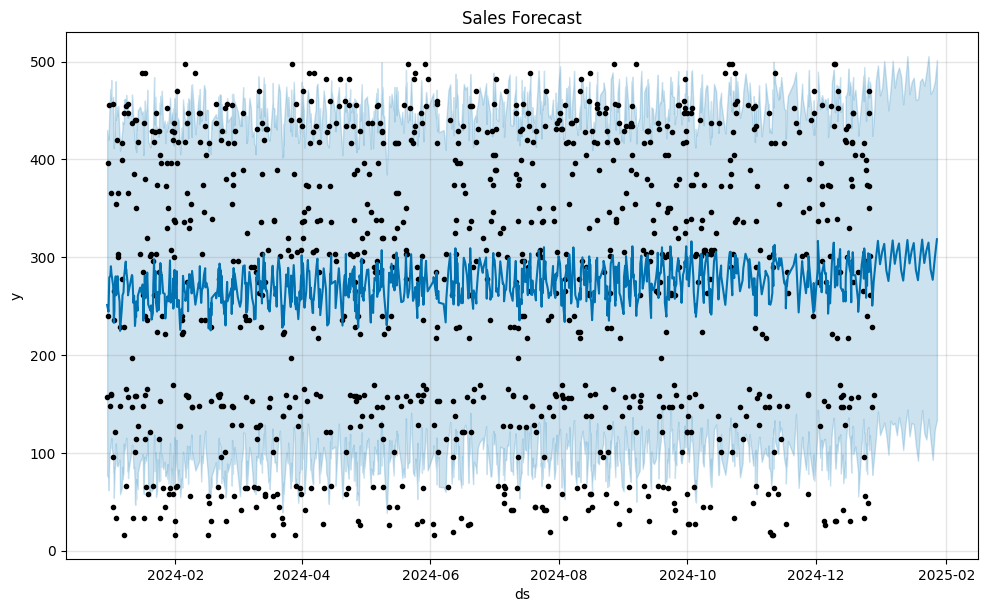

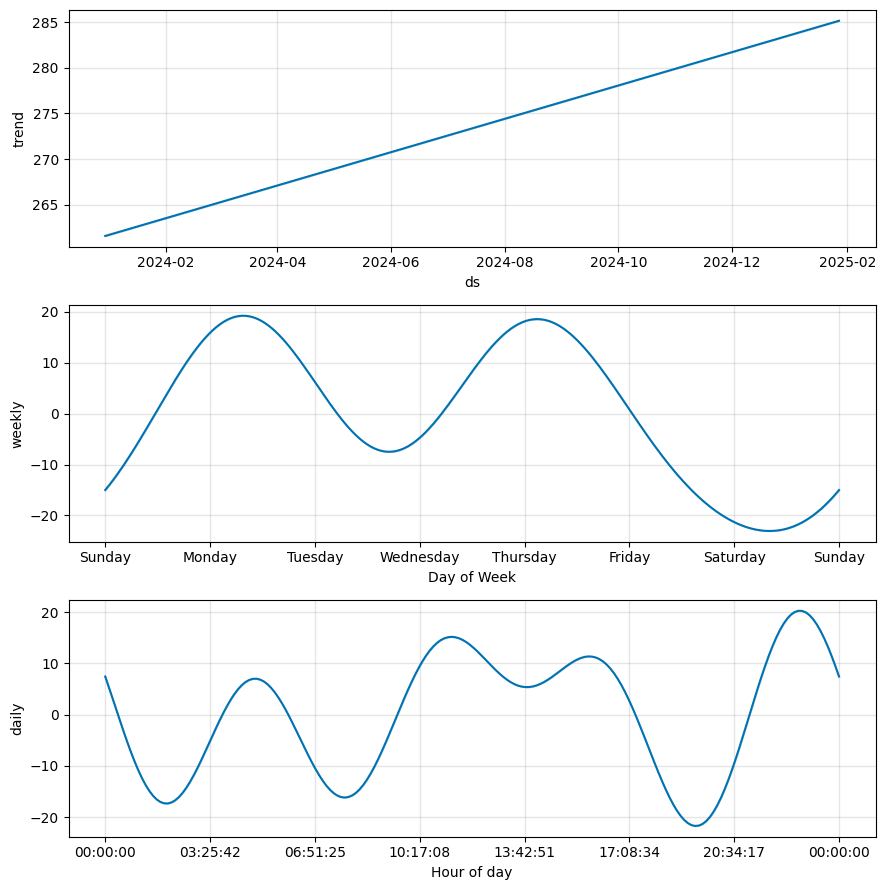

In [ ]:


from prophet import Prophet

prophet_df = daily_sales.reset_index()
prophet_df.columns = ['ds', 'y']
model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Sales Forecast')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

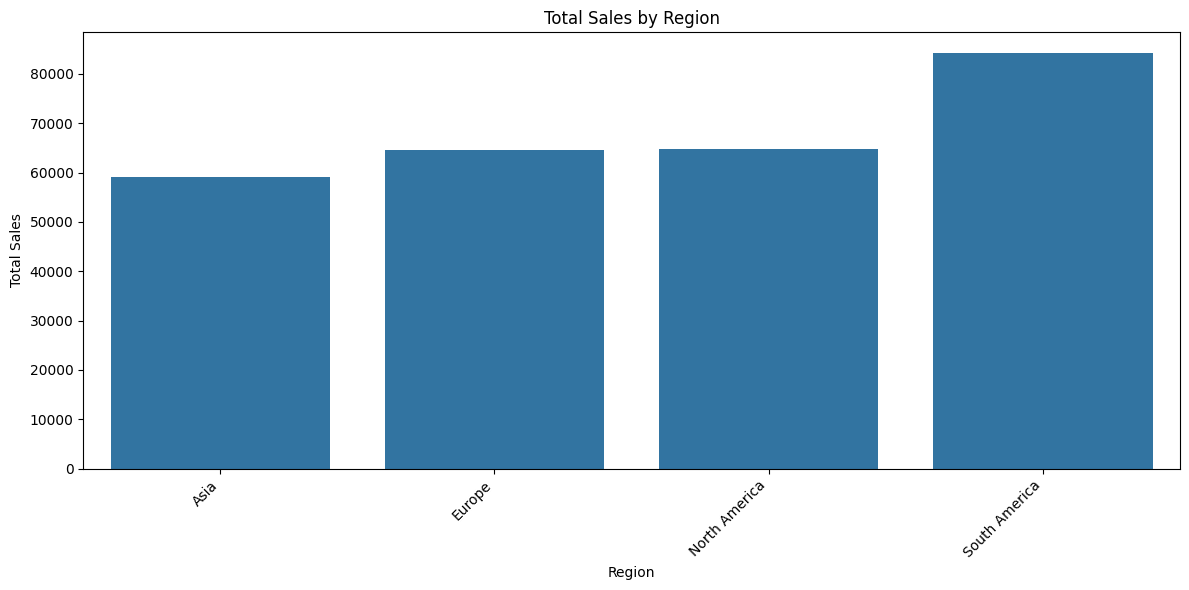

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'Region' in final_merged_df.columns:
    region_sales = final_merged_df.groupby('Region')['Price_x'].sum()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=region_sales.index, y=region_sales.values)
    plt.xlabel("Region")
    plt.ylabel("Total Sales")
    plt.title("Total Sales by Region")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("The 'Region' column is not found in the dataframe. Please check your data")


